
# 打印出字符串最大不重复子串及长度

In [1]:
def max_length(s):
    if not s:
        return None
    res = {}
    end = 0
    m = 1
    result = [0,0]
    if len(set(s)) == len(s):
        return [s]
    for i in range(len(s)):
        if s[i] in res:
            end = max(end,res[s[i]]+1)
        res[s[i]] = i
        if i-end+1 >= result[1]-result[0]+1:
            result[0] = end
            result[1] = i
#         m = max(m,i-end+1)
    return s[result[0]:result[1]+1]

In [2]:
max_length('abcdaca')

'bcda'

# 剪绳子

均值不等式定理，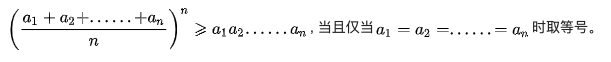

均值不等式也可以看成是“对于若干个非负实数，它们的算术平均不小于几何平均“

将绳子n按照x的长度的a段，即$n=ax$，，乘积为$x^a$，$a=n/x$,所以函数目标可以优化为$f(x)=(x)^(n/x)$，求$f(x)$最大值

对$f(x)$求导，<br>$\ln f(x)=\frac {n}{x} \ln x$ <br>
${\ln f(x)}^\prime=(\frac{n}{x})^\prime\ln x+\frac{n}{x}(\ln x)^\prime$<br>
$\frac{1}{f(x)}.f^\prime(x)=-\frac{n}{x^2}\ln x+\frac{n}{x}.\frac{1}{x}$<br>
$f^\prime(x)=\frac{n}{x^2}(1-\ln x).f(x)$<br>
$f^\prime(x)=\frac{n}{x^2}(1-\ln x).{x}^\frac {n}{x}$

求最大值，令$f^\prime(x)$，即$1-\ln x=0$，$x=e$，因为e的值在2～3之间，且$f(3)>f(2)$，所以切绳子的每段最优排序为$f(3)>f(2)>f(1)$（$f(4)$可以继续最优分割，所以只能取比3小且为整数的值）

自此，切绳子问题转化成了取余的问题

In [118]:
from functools import reduce
def cut_rop(x):
    if x == 1:
        return 1
    if x == 2:
        return 1
    if x == 3:
        return 2
    result = []
    if x%3==2:
        result = [3 for i in range(x//3)]+[2]
    if x%3==0:
        result = [3 for i in range(x//3)]
    if x%3==1:
        result = [3 for i in range(x//3-1)]+[2,2]
    return reduce(lambda x,y:x*y,result)

动态规划解法<br>
1.创建dp数组，注意当绳子长度小于4时，返回的数字和dp数组里存的数字不一致<br>
2.子问题切分，无论绳子有多长，都可以将绳子划分为两段，每段为各自长度绳子的最大乘积,而这个乘积在之前已经计算过保存在dp数组里<br>
3.第三层循环用一个指针将长为i的绳子分割成两段，取两段$dp[j]$和$dp[i-j]$的最大乘积<br>
4.最终$dp[-1]$是我们的最大乘积

In [5]:
def cut_rope_dp(x):
    if x == 1:
        return 1
    if x == 2:
        return 1
    if x == 3:
        return 2
    if x == 4:
        return 4
    dp = [0]*(x+1)
    for i in range(1,x+1):
        if i == 1:
            dp[i] = 1 
        if i == 2:
            dp[i] = 2
        if i == 3:
            dp[i] = 3
        if i == 4:
            dp[i] = 4
        for j in range(1,i+1):
            dp[i] = max(dp[i],dp[j]*dp[i-j])
    return dp[-1]

# 最长回文子串

给定一个字符串 s，找到 s 中最长的回文子串。你可以假设 s 的最大长度为 1000。<br>

1.子问题分割，一个字符串的子字符串是否是回文，一个回文两头的字符串去掉之后仍然是回文(状态转移)<br>
2.定义状态转移，$dp[i][j]$代表$s[i...j]$是否是回文，如果$dp[i][j]$是回文，则$dp[i+1][j-1]$也是回文,因此转移条件为$s[i]==s[j]$，$dp[i][j]$的状态由$dp[i+1][j-1]$决定，当$j-i$<3时，$s[i]==s[j]$，$s[i...j]$肯定是回文<br>

$[[0]*len(s)]*len(s)$第二层创建的是浅拷贝，修改一个数会修改一整列，因此必须用循环的方法

In [685]:
def longestPalindrome(s):
    dp = [[False for i in range(len(s))] for i in range(len(s))]
    max_range = [0,0]
    for i in range(len(s)-2,-1,-1):
        for j in range(i+1,len(s)):
            if s[i] == s[j]:
                if j-i<3:
                    dp[i][j] = True
                else:
                    dp[i][j] = dp[i+1][j-1]
            else:
                dp[i][j] = False
            if dp[i][j] and j-i>=max_range[1]-max_range[0]:
                max_range = [i,j]
    return s[max_range[0]:max_range[1]+1]

In [688]:
s = 'dsfsddsfsdhadhdsfsdhadhfkddsfsdhadhfkdsahfksadhdsfsdhadhfkdsahfksadhfksddsfsdhadhfkdsahfksadhfksdhfusdihfksjadfhksadjkdsahfdsjkhfksdhffhiawoeuruihweiyrtiuoncsdbfzmbfkhfioaewncfhskdsfsdhadhfkdsahfksadhfksdhfusdihfksjadfhksadjkdsahfdsjkhfksdhffhiawoeuruihweiyrtiuoncsdbfzmbfkhfioaewncfhskhfusdihfksjadfhksadjkdsahfdsjkhfksdhffhiawoeuruihweiyrtiuoncsdbfzmbfkhfioaewncfhskdsfsdhadhfkdsahfksadhfksdhfusdihfksjadfhksadjkdsahfdsjkhfksdhffhiawoeuruihweiyrtiuoncsdbfzmbfkhfioaewncfhskdsfsdhadhfkdsahfksadhfksdhfusdihfksjadfhksadjkdsahfdsjkhfksdhffhiawoeuruihweiyrtiuoncsdbfzmbfkhfioaewncfhskdsfsdhadhfkdsahfksadhfksdhfusdihfksjadsfsdhadhfkdsahfksadhfksdhfusdihfksjadfhksadjkdsahfdsjkhfksdhffhiawoeuruihweiyrtiuoncsdbfzmbfkhfioaewncfhskdsfsdhadhfkdsahfksadhfksdhfusdihfksjadfhksadjkdsahfdsjkhfksdhffhiawoeuruihweiyrtiuoncsdbfzmbfkhfioaewncfhskdfhksadjkdsahfdsjkhfksdhffhiawoeuruihweiyrtiuoncsdbfzmbfkhfioaewncfhskfdsfsdhadhfkdsahfksadhfksdhfusdihfksjadfhksadjkdsahfdsjkhfksdhffhiawoeuruihweiyrtiuoncsdbfzmbfkhfioaewncfhskksdhfusdihfksjadfhksadjkdsahfdsjkhfksdhffhiawoeuruihweiyrtiuoncsdbfzmbfkhfioaewncfhsksahfksadhfksdhfusdihfksjadfhksadjkdsahfdsjkhfksdhffhiawoeuruihweiyrtiuoncsdbfzmbfkhfioaewncfhskfkdsahfksadhfksdhfusdihfksjadfhksadjkdsahfdsjkhfksdhffhiawoeuruihweiyrtiuoncsdbfzmbfkhfioaewncfhskahfksadhfksdhfusdihfksjadfhksadjkdsahfdsjkhfksdhffhiawoeuruihweiyrtiuoncsdbfzmbfkhfioaewncfhsk'
longestPalindrome(s)

'dsfsddsfsd'

回文子串的数量，单字符也是回文

In [513]:
def countSubstrings(s):
    result = []
    dp = [[False]*len(s) for _ in range(len(s))]
    count = 0
    for i in range(len(s)-1,-1,-1):
        for j in range(i,len(s)):
            if s[i] == s[j]:
                if j-i < 3:
                    dp[i][j] = True
                else:
                    dp[i][j] = dp[i+1][j-1]
            else:
                dp[i][j] = False
            if dp[i][j]:
                result.append(s[i:j+1])
    return result

In [515]:
a = 'xkjkqlajprjwefilxgpdpebieswu'
print(countSubstrings(a))

['u', 'w', 's', 'e', 'i', 'b', 'e', 'p', 'd', 'p', 'pdp', 'g', 'x', 'l', 'i', 'f', 'e', 'w', 'j', 'r', 'p', 'j', 'a', 'l', 'q', 'k', 'j', 'k', 'kjk', 'x']


# 汉诺塔问题，递归调用

In [340]:
def move(n,a,b,c):
    if n==1:
        print(a,'-->',c)   #如果只有一个盘子，直接从a柱移动到c柱
    else: 
        move(n-1,a,c,b)    #将a柱上的n-1个盘子通过a柱移动到b柱
        print(a,'-->',c)   #移动完n-1个盘子之后，a柱剩下的最大盘子直接从a柱移到c柱
        move(n-1,b,a,c)    #b柱上的n-1个盘子通过a柱移动到c柱
move(3,'a','b','c')

a --> c
a --> b
c --> b
a --> c
b --> a
b --> c
a --> c


# 凑硬币问题

1.子问题分割，第$f(n)$个结果有两种取值情况,(1)$f(n)=f(n-1)+1$，指前一个数目的硬币加上一枚面值为1的硬币；(2)$f(n)=f(n-x_i)+1$其中$x_i$为第$i$枚硬币的面值，且$n-x_i>=0$，用当前数额减去一个面值的硬币，硬币数量在加1。<br>
2.所以状态转移方程$dp[i]=min\{f(n-1)+1,f(n-x_i)+1\}$,由于第一种情况是面值中包含1的硬币的特殊情况，因此只用考虑情况(2)$dp[i]=min\{f(n-x_i)+1\}$<br>
3.除第0个位置为0外，其余位置为0则无法组成目标数字

In [690]:
def coin_select(coins,target):
    if target == 0:
        return 0
    dp = [0 for i in range(target+1)]
    for i in range(1,len(dp)):
        if i == 1 and i in coins:
            dp[1] = 1
        min_coin = []
        for j in coins:
            if i - j < 0:
                continue
            if i - j != 0 and dp[i-j]==0:
                dp[i] = 0
                continue
            min_coin.append(dp[i-j]+1)
        if not min_coin:
            continue
        dp[i] = min(min_coin)
    if dp[-1]==0:
        return -1
    return dp[-1]

In [691]:
coin_select([186,419,83,408],6249)

20

# 目标和 

给定一个列表和一个目标数，有{+，-}两种运算符，共有多少种方法能够让数之和等于目标数

回溯法基本框架<br>
$ 
def \ backtrack(路径, 选择列表):\\
    \quad if \ 满足结束条件:\\
        \quad \quad result.add(路径)\\
        \quad \quad return\\
    \quad for \ 选择 \ in \ 选择列表:\\
        \quad \quad 做选择\\
        \quad \quad backtrack(路径, 选择列表)\\
        \quad \quad 撤销选择\\
$


# 最长上升子序列

1.子问题拆分：$dp[i]$表示以第$i$个字符结尾的递增子序列长度，其数值等于$max\{dp[j]+1\}$且$j$满足$j<i$且$nums[j]<nums[i]$

In [234]:
def lengthOfLIS(nums):
    if not nums:
        return 0
    dp = [1 for i in range(len(nums))]
    for i in range(1,len(nums)):
        tmp_length = 1
        for j in range(i-1,-1,-1):
            if nums[j] < nums[i]:
                tmp_length = max(tmp_length,dp[j]+1)
        dp[i] = tmp_length
    return dp

In [235]:
nums = [1,3,6,7,9,4,10,5,6]
lengthOfLIS(nums)

[1, 2, 3, 4, 5, 3, 6, 4, 5]

# 最大子序和

1.子问题拆分：$dp[i]$表示第$i$个字符结尾的的最大子序和，状态$dp[i]$有三种情况：$dp[i-1]$个和加上$nums[i]$，$nums[i]+nums[i-1]$，$nums[i]$中的最大值，其值为$dp[i]=max\{dp[i-1]+nums[i],nums[i]+nums[i-1],num[i]\}$<br>
2.其实就是针对前$i$个的最大和选择和不选择的问题，在位置$i$处三种选择，加上前$i-1$项的最大和，从$i-1$开始从新加，从$i$开始从新算

In [13]:
def maxSubArray(nums):
    if not nums:
        return 0
    dp = [0]*len(nums)
    dp[0] = nums[0]
    for i in range(1,len(nums)):
        tmp_sum = 0
        tmp_sum = max(dp[i-1]+nums[i],nums[i])
        dp[i] = tmp_sum
    return dp

In [14]:
nums = [-2,1,-3,4,-1,2,1,-5,4]
maxSubArray(nums)

[-2, 1, -2, 4, 3, 5, 6, 1, 5]

# 0-1背包问题

1:子问题分割$dp[i][j]$表示容量为$i$的背包在第$j$个货物是获得的最大价值<br>
2:针对货物i，有两种选择，装，或者不装，装最大价值为$i-1$个货物在重量$j-w[i]$处的最大价值加上$val[i]$，不装则等于货物$i-1$在重量$j$处的最大价值$dp[i][j]$<br>
3:状态转移方程为$dp[i][j] = max(dp[i-1][j],dp[i-1][j-wt[i]]+val[i])$

In [1018]:
def bag_select(N,W,wt,val):
    dp = [[0]*(W+1) for i in range(len(wt)+1)]
    for i in range(1,N+1):
        for j in range(1,W+1):
            if j >= wt[i-1]:
                dp[i][j] = max(dp[i-1][j],dp[i-1][j-wt[i-1]]+val[i-1])
            else:
                dp[i][j] = dp[i-1][j]
    return dp[-1][-1]

In [1019]:
N = 3
W = 4
wt = [2, 1, 3]
val = [4, 2, 3]
bag_select(N,W,wt,val)

6

# 分割等和子集

1.分割等和子集可以看作是分割成两个子集，每个子集是容量为$sum(nums)/2$的背包，能否恰好装满。<br>
2.子问题分割：$dp[i][j]$表示对于前i个物品，能否装满容量为j的背包，背包容量为$sum(nums)/2$，如果在$dp[N][sum(nums)/2]$为ture，则能够装满，（目标为$sum(nums)/2$，一边能够装满，另一边也能够装满）<br>
3.状态转移方程为$dp[i][j] = max(dp[i-1][j],dp[i-1][j-nums[i]]+nums[i])$

In [1022]:
def split_nums(nums):
    if not nums:
        return False
    target = sum(nums)/2
    if target%1 != 0:
        return False
    target = int(target)
    dp = [[0]*(target+1) for i in range(len(nums)+1)]
    for i in range(1,len(nums)+1):
        for j in range(1,target+1):
            if j >= nums[i-1]:
                dp[i][j] = max(dp[i-1][j],dp[i-1][j-nums[i-1]]+nums[i-1])
            else:
                dp[i][j] = dp[i-1][j]
    if dp[-1][-1] == target:
        return True
    else:
        return False

In [1023]:
nums = [1,2,3,5]
split_nums(nums)

False

# 零钱兑换

1.子问题分割:$dp[i][j]$可以看作在目标为$j$时，第$i$个面值的硬币能够凑够的数量<br>
2.状态转移方程为$dp[i][j]=max\{dp[i-1][j],dp[i-1][j-nums[j]+1\}$ 

In [268]:
def change_coin(amount,coins):
    if not coins and amount==0:
        return 1
    if not coins:
        return 0
    dp = [[0]*(amount+1) for i in range(len(coins)+1)]
    for i in range(1,len(coins)+1):
        dp[i][0] = 1
    for i in range(1,len(coins)+1):
        for j in range(1,amount+1):
            if coins[i-1]<=j:
                dp[i][j] = max(dp[i-1][j],dp[i][j-coins[i-1]]+dp[i-1][j])
            else:
                dp[i][j] = dp[i-1][j]
    return dp[-1][-1]

In [269]:
amount = 5
coins = [1,2,5]
change_coin(amount,coins)

6

# 编辑距离

编辑距离可能存在四种状态，增加，删除，替换，跳过，假设对两个字符串遍历，其中$i$遍历$a$，$j$遍历$b$,在四种操作下的状态转移情况为<br>
增加：$dp[i][j] = dp[i][j-1]+1$，在$i$的位置增加一个和$s[j]$一样的字符，继续比较下一位。<br>
删除：$dp[i][j] = dp[i-1][j]+1$，在$i$的位置删除字符，后退继续比较。<br>
替换：$dp[i][j] = dp[i-1][j-1]+1$，在$i$的位置字符替换为$j$，后退继续比较。<br>
跳过：$dp[i][j] = dp[i-1][j-1]$，如果$a[i]$，$b[j]$位置字符一致，则不做操作

In [8]:
def edite_dis(a,b):
    dp = [[0]*(len(b)+1) for i in range(len(a)+1)]
    for i in range(1,len(a)+1):
        dp[i][0] = i
    for j in range(1,len(b)+1):
        dp[0][j] = j
    for i in range(1,len(a)+1):
        for j in range(1,len(b)+1):
            if a[i-1]==b[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = min(dp[i-1][j-1]+1,dp[i-1][j]+1,dp[i][j-1]+1)
    return dp[-1][-1]

In [10]:
a = '麻辣锅'
b = '香辣锅'
edite_dis(a,b)

1

# 堆排序

1.堆排序的重点是构建最大最小堆，堆的叶子节点一定小于根结点，同时第$i$个根结点的左叶子节点为$2*i+1$（python从位置0开始算），右叶子节点为$2*i+2$，根结点先和左叶子节点对比，在和右叶子节点对比<br>
2.将最后一个数与root节点调换位置，root节点输出，进行调整，结果就是排序结果，同理，解决topK问题也是一样，topK是借助最小顶堆完成的，将第$k+1$个数字与root节点比较，如果比root节点大，则抛弃目前的堆顶，将数字加入堆，调整，遍历完序列后topK存在堆中

In [1149]:
def adjust_heap(L):
    i = 0
    while i < len(L):
        if 2*i+1 > len(L)-1:
            break
        if L[i] < L[2*i+1]:
            L[i],L[2*i+1] = L[2*i+1],L[i]
        if 2*i+2 > len(L)-1:
            break
        if L[i] < L[2*i+2]:
            L[i],L[2*i+2] = L[2*i+2],L[i]
        i += 1
    return L

def heap_sort(nums):
    result = []
    while nums:
        for i in range(len(nums)//2):#需要调整的次数来构造一个堆，代表每个有孩子的节点都要调整一次
            nums = adjust_heap(nums)
        nums[0],nums[-1] = nums[-1],nums[0]
        result.append(nums[-1])
        nums = nums[:-1]
    return result

In [1150]:
arr = [4, 6, 7, 2, 9, 8, 3, 5]
heap_sort(arr)

[9, 8, 7, 6, 5, 4, 3, 2]

# 集合的全子集

In [1403]:
def allSubsets(s):
    if len(s) == 0 :
        return [[]]
    res = allSubsets(s[1:])
    las = [[s[0]] + r for r in res]
    return  res+las

In [360]:
allSubsets([1,2,3])

[1, 2, 3, 1, 3, 2, 2, 1, 3, 2, 3, 1, 3, 1, 2, 3, 2, 1]

二进制解法：长度为$N$的列表的全子集数量为$2^N$，且有一个规律，第$i$个子集的元素为$i$的二进制$1$的位所对应的下标在列表中的取值,例如：<br>
$0 \quad [] \quad 0000$<br>$1 \quad [1] \quad 0001$<br>$2 \quad [2] \quad 0010$<br>$3 \quad [1, 2] \quad 0011$<br>$4 \quad [3] \quad 0100$<br>$5 \quad [1, 3] \quad 0101$ <br>$6 \quad [2, 3] \quad 0110$<br>$7 \quad [1, 2, 3] \quad 0111$<br>
判断二进制的$i$位是否为1，将二进制左移$>>$$i$位，在和1做$&$与运算，结果为$1$则为$1$，否则为$0$

In [1]:
def allSubsets(items):
    N = len(items)
    result = []
    for i in range(2 ** N):#子集的个数
        combo = []
        for j in range(N):
            if (i >> j)&1:#用来判断二进制数的下标为j的位置的数是否为1
                combo.append(items[j])
        result.append(combo)
    return result

In [4]:
s = [1,2,3]

In [5]:
allSubsets(s)

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

# 64匹马、8赛道，至少多少轮比赛找出速度最快的4匹马?

1.1~8轮，每队8匹马，进行比赛，得出第一名排名小于4的组，删除，还剩32，在在第一名排名前四的组中，删除后四位，还剩16，还可以继续删除<br>
2.第一排名第四的组，除了第一名，其他均不可以进入前四，排名第三名的组，除了前二，其他均不可能进入前四，以此类推，排名第二的组，第四名不可能进入前四，依次删除$3+2+1$，应为第一组的第一名铁定是第一名，所以还剩9位<br>
$A_1,A_2,A_3,A_4$<br>
$B_1,B_2,B_3$<br>
$C_1,C_2$<br>
$D_1$<br>
2.第9轮，$A_1$为第一名，不用在比，将$A_3$放到一边，剩余的进行比赛，如果$A_2$没进前三或者刚好位于是三名，则取前三，结束。<br>
3.第10轮，如果$A_2$进了前三，前$loc(A_2)$位不用在比较，剩余的比赛，获取$3-loc(A_2)$，前四名排出。
结果，9轮或者10轮

# 高楼扔鸡蛋问题

转换思路，$i$个鸡蛋能覆盖多少层楼
用$dp[i][j]$数组表示$i$个鸡蛋$j$次机会可以确定的楼层数量，当从$X$层扔下鸡蛋，如果鸡蛋碎了，可以确定$dp[i-1][j-1]+1$层，其中$+1$为x层，如果鸡蛋没碎，则可以确定$dp[i][j-1]$层，$dp[i][j]$必定小于等于楼层N,否则返回机会j。<br>
在任意情况下，任意数量的鸡蛋在N次机会可以确定N层楼（从第一层往上扔）

In [34]:
def drop_egg(N,K):
    if N==K and N==1:
        return 1
    dp = [[0 for i in range(N+1)] for j in range(K+1)]           
    for i in range(1,K+1):
        for j in range(1,N+1):
            dp[i][j] = dp[i][j-1] + dp[i-1][j-1]+1
            if dp[K][j] >= N:
                return j

In [35]:
drop_egg(14,3)

4

# 数列求和

求子序列的和最接近目标的最大子序和以及开始位置结束位置的索引<br>
维护一个列表，初始值压入数字，和小于$target$，记录，从末尾增加数字，头部弹出数字，如果数组的和大于$target$,则弹出头部数字，直到剩余的和加上数字$i$小于$target$，对比历史记录，更新

In [253]:
def max_sum(target,len_nums,nums):
    mark_list = []
    start = 0
    end = 0
    sum_flag = 0
    for i in range(len_nums):
        if sum(mark_list)+nums[i]>target:
            break
        mark_list.append(nums[i])
        end = i
        sum_flag = sum(mark_list)
        start = i-len(mark_list)+1
    for i in range(end+1,len_nums):
        while sum(mark_list)+nums[i] > target:
            mark_list.pop(0)
        mark_list = mark_list+[nums[i]]
        if sum(mark_list) > sum_flag:
            end = i
            sum_flag = sum(mark_list)
            start = i-len(mark_list)
    return sum_flag,start,end

In [254]:
len_nums = 6
target = 11
nums = [2,3,4,5,4,6]
max_sum(target,len_nums,nums)

(10, 3, 5)

# 戳气球

子问题必须独立，所以需要转化<br>
定义$dp[i][j]$表示开区间$(i,j)$内可以获得的最大和，不戳破$i$,$j$,设戳破的最后一个气球为$k$，则该次戳破气球的值为$nums[i]*nums[k]*nums[j]$，而区间$dp[i][j]$的值为$dp[i][j] = dp[i][k]+nums[i]*nums[k]*nums[j]+dp[k][j]$

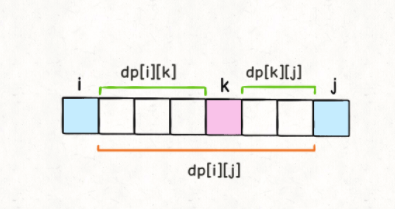

我们要求的值就是$0到len(nums)-1$的范围内的最大值（开区间不包含端点）<br>
需要确保在求$dp[i][j]$时$dp[i][k]$和$dp[k][j]$必须已经求出来，最后需要的结果是右上角，所以需要从下到上，从左到右的求

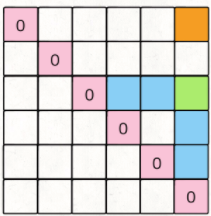

In [82]:
def BurstBalloon(nums):
    nums_length = len(nums)
    dp = [[0]*(nums_length+2) for i in range(nums_length+2)]
    nums = [1]+nums+[1]
    for i in range(len(nums)-1,-1,-1):
        for j in range(i+1,len(nums)):
            for k in range(i+1,j):
                dp[i][j] = max(dp[i][j],dp[i][k]+nums[i]*nums[k]*nums[j]+dp[k][j])
    return dp[0][-1]

In [83]:
BurstBalloon([3,1,5,8])

167

# 最长公共子序列

传统的二维数组解法，$dp[i][j]$表示$a$的第$i$个位置和$b$的第$j$个位置的最大公共子串长度，如果$a[i]==b[j]$,则$dp[i-1][j-1]+1$否则必定有一个不在里面，长度为$max(dp[i-1][j],dp[i][j-1])$<br>
状态转移方程为$dp[i][j] = dp[i-1][j-1]+1 \quad if \quad text1[i] == text2[j] \quad else \quad max(dp[i-1][j],dp[i][j-1])$

In [172]:
def longestCommonSubsequence(text1,text2):
    dp = [[0]*(len(text2)+1) for _ in range(len(text1)+1)]
    for i in range(1,len(text1)+1):
        for j in range(1,len(text2)+1):
            if text1[i-1] == text2[j-1]:
                dp[i][j] = dp[i-1][j-1]+1
            else:
                dp[i][j] = max(dp[i-1][j],dp[i][j-1])
    return dp

In [175]:
a,b = "1AB2345CD","12345EF"

In [176]:
longestCommonSubsequence(a,b)

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 2, 2, 2, 2, 2, 2],
 [0, 1, 2, 3, 3, 3, 3, 3],
 [0, 1, 2, 3, 4, 4, 4, 4],
 [0, 1, 2, 3, 4, 5, 5, 5],
 [0, 1, 2, 3, 4, 5, 5, 5],
 [0, 1, 2, 3, 4, 5, 5, 5]]

# 扔石子

$dp[i][j]$表示在$i到j$的范围内先后手能选到的最大和，明确一个概念，作为先手选择了石头$i$,则对于$i+1,j$就变成了后手，反之也成立。同时，每区间还包含这两种状态，先手和后手。<br>
对于$dp[i][j]$先手有两种选择，选择$i或j$，选择其中最大的一个，所以$dp[i][j].fir=max{dp[i+1][j].sec+nums[i],dp[i][j-1].sec+nums[j]}$<br>
$dp[i][j].sec$的选择取决于先手，如果先手选择了$i$,$dp[i][j].sec = dp[i+1][j].fir$，如果先手选择了$j$，则$dp[i][j].sec = dp[i][j-1].fir$<br>
因为我们最终需要的值是$dp[0][-1]$,所以需要从下往上，从左往右的遍历

In [175]:
def stoneGame(nums):
    dp = [[[0,0] for j in range(len(nums))] for i in range(len(nums))]
    for i in range(len(nums)):
        dp[i][i][0] = nums[i]
        dp[i][i][1] = 0
    for i in range(len(nums)-1,-1,-1):
        for j in range(i+1,len(nums)):
            if i == j:
                continue
            left = dp[i+1][j][1]+nums[i]
            right = dp[i][j-1][1]+nums[j]
            if left > right:
                dp[i][j][0] = left
                dp[i][j][1] = dp[i+1][j][0]
            else:
                dp[i][j][0] = right
                dp[i][j][1] = dp[i][j-1][0]
    return dp[0][-1]

In [176]:
stoneGame([3,9,1,2])

[11, 4]

# 正则匹配

匹配状态有两种，当$s[i] \quad in \quad \{p[j],`.`\}$时，$dp[i][j] = dp[i-1][j-1]$<br>
如果$p[j]==`*`$，如果$p$的长度大于2，有两种选择，不重复$*$前面的字符，$dp[i][j] = dp[i][j-2]$，因为$*$是前面字符的重复，且在当前状态下，只用考虑前一步是否重复<br>
或者放弃前面的匹配，从$s$的下一个字符开始重新匹配，$dp[i][j] = dp[i-1][j]$

In [167]:
def isMatch_re(s,p):
    if not p:
        return not s
    firstmatch = bool(s) and p[0] in (s[0],'.')
    if len(p)>=2 and p[1] == '*':
        return isMatch_re(s,p[2:]) or (firstmatch and isMatch_re(s[1:],p))
    else:
        return firstmatch and isMatch_re(s[1:],p[1:])

In [251]:
def isMatch(s,p):
    if not p:
        return not s
    dp = [[False]*(len(p)+1) for _ in range(len(s)+1)]
    dp[0][0] = True
    for i in range(len(s)+1):
        for j in range(1,len(p)+1):
            if i == 0:
                if j>1 and p[j-1] == '*':
                    dp[i][j] = dp[i][j-2]
            elif p[j-1] == s[i-1] or p[j-1] == '.':
                dp[i][j] = dp[i-1][j-1]
            elif j > 1 and p[j-1] == '*':
                dp[i][j] = (p[j-2] in (s[i-1],'.') and dp[i-1][j]) or dp[i][j-2]#两种情况，重复0次，直接抛弃p中的*和之前的字符；或者和*之前的字符匹配，s后移一位实现重复的逻辑
            else:
                dp[i][j] = False
    return dp[-1][-1]

In [252]:
# s = "mississippi"
# p = "mis*is*p*."
# s = "ab"
# p = ".*"
# s = "aaa"
# p = "aaaa"
# s = "aab"
# p = "c*a*b"
# s = ""
# p = ".*"
# s = "mississippi"
# p = "mis*is*ip*."
s = "aaa"
p = "ab*a*c*a"
print(isMatch(s,p))

True


# 四键盘问题

如何在 N 次敲击按钮后得到最多的 A，可以有四种操作，输入A，全选，粘贴，复制<br>
$dp[i]$表示前$i$次机会能够获得的最大的A的数量，每次都有两种选择，直接打A，或者粘贴，粘贴要经过前两部的操作，全选，复制。<br>
要遍历$0～i$之间的范围，确定改范围内最多A的数量，其中选择是在某一次开始粘贴，并且后面一直粘贴，$dp[j-2]*(i-j+1)$表示在$j-2$出复制的Ac从第$j$次开始粘贴，重复次数为i-j+1（i为本身的这次）。

In [261]:
def maxA(N):
    dp = [0]*(N)
    dp[0] = 1
    for i in range(1,N):
        dp[i] = dp[i-1]+1
        for j in range(2,i):
            dp[i] = max(dp[i],dp[j-2]*(i-j+1))
    return dp[-1]

In [262]:
maxA(7)

9

# KMP字符串匹配

KMP字符串匹配的重点在于，匹配的状态只和模式字符串相关，并且指针不回退，只借助dp数组进行状态转移，难点在于，遇到不同的字符，状态转移的位置也不一样，如果字符与$pat[i]$不一致，则状态回传

In [522]:
def KMP(pat,text):
    chr_list = list(text)
    pat_list = list(pat)
    dp = [[0]*len(chr_list) for _ in range(len(pat_list))]
    sh_flag = 0
    for i in range(1,len(pat_list)):
        for j in range(len(chr_list)):
            if i == 0:
                dp[i][j] = 1
                continue
            if chr_list[j] == pat_list[i]:
                dp[i][j] = i + 1
            else:
                dp[i][j] = dp[sh_flag][j]
        sh_flag = dp[sh_flag][i]
    return dp     

In [523]:
a = 'CABAABABAC'
c = 'ABABC'
KMP(c,a)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 2, 0, 0, 2, 0, 2, 0, 0],
 [1, 3, 1, 3, 3, 1, 3, 1, 3, 1],
 [0, 0, 4, 0, 0, 4, 0, 4, 0, 0],
 [5, 1, 1, 1, 1, 1, 1, 1, 1, 5]]

# 区间调度

给定一个区间集合，请你设计一个算法，算出这些区间中最多有几个互不相交的区间

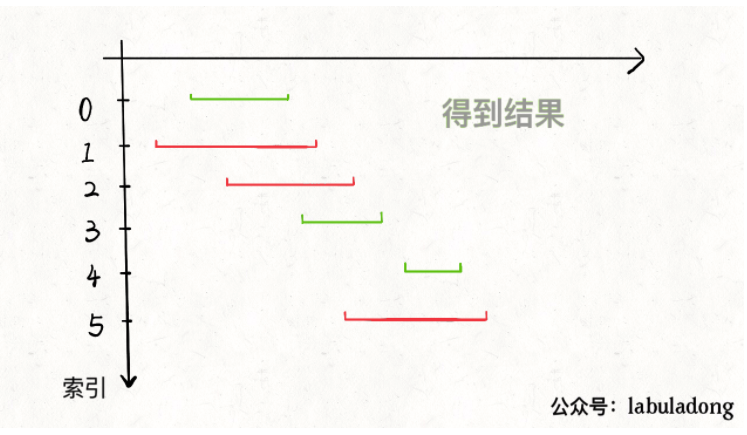

按照结束排序，如果下一条的开始小于上一条的结束，则有交集，否则没有

In [312]:
def eraseOverlapIntervals(intervals):
    if not intervals:
        return 0
    intervals = sorted(intervals,key=lambda x:x[1],reverse=False)
    result = [intervals[0]]
    end = intervals[0][1]
    for atr in intervals[1:]:
        if atr[0] > end:
            result.append(atr)
            end = atr[1]
    return len(result)

In [313]:
intervals = [[1,2],[3,4],[5,6],[7,8]]
eraseOverlapIntervals(intervals)

4

# 股票买卖问题

问题拆解之后存在的状态有三个，天数，交易次数，持有状态（持有或者不持有），用三维数组表示就是$dp[i][j][k],其中k \in \{0,1\}$，持有或者不持有<br>
$dp[i][j][1]$解释为第$i$天，手上持有股票。交易的次数最多为$j$，我们所求的目标是最后一天$N$，允许$K$次交易,手中不持有股票（0）所获得的最大利润<br>
状态转移情况入下图所示<br>
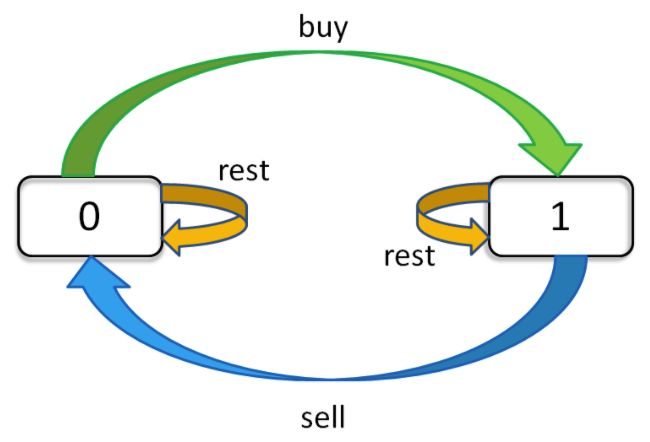

$𝑑𝑝[𝑖][𝑗][1] = max(𝑑𝑝[𝑖-1][𝑗][1],dp[i-1][j][0]-price[i])$如果是持有状态，前一天的状态要不是持有，今天无操作，要不是前一天不持有，今天买入，利润减去当天的价格，同理可得到<br>
$𝑑𝑝[𝑖][𝑗][0] = max(𝑑𝑝[𝑖-1][𝑗][0],dp[i-1][j-1][1]+price[i])$如果是不持有状态，要不是前一天不持有，要不是前一天持有，交易状态-1，按照今天的价格卖出，利润加上当天的价格

交易次数为1，则在上述的状态转移方程中第二维$j$失效<br>
并且存在特殊情况，$𝑑𝑝[𝑖][1]$时如果本次买入，由于只有一次操作，所以前面不允许任何操作，即买入之后利润为$-price[i]$<br>
$𝑑𝑝[𝑖][1] = max(𝑑𝑝[𝑖-1][1],-price[i])$<br>
$𝑑𝑝[𝑖][0] = max(𝑑𝑝[𝑖-1][0],dp[i-1][1]+price[i])$<br>
处理特殊case，当天数为第一天时，持有，利润为$-price[i]$，不持有利润为0

In [364]:
#设置交易次数限制为1
def maxProfit(price):
    if not price:
        return 0
    dp = [[0]*2 for _ in range(len(price))]
    for i in range(len(price)):
        if i == 0:
            dp[i][1] = -price[i]
            dp[i][0] = 0
            continue
        dp[i][1] = max(dp[i-1][1],-price[i])
        dp[i][0] = max(dp[i-1][0],dp[i-1][1]+price[i])
    return dp[-1][0]

In [365]:
price = [7,1,5,3,6,4]
maxProfit(price)

5

交易次数不限制的情况下，则在上述的状态转移方程中第二维$j$同样失效，不同的是选择买入时的特殊情况<br>
选择买入时的特殊情况，$𝑑𝑝[𝑖][1]$时如果本次买入，由于不限制操作，买入之后利润为前一次的不持有利润$dp[i-1][0]-price[i]$<br>
$𝑑𝑝[𝑖][1] = max(𝑑𝑝[𝑖-1][1],dp[i-1][0]-price[i])$<br>
$𝑑𝑝[𝑖][0] = max(𝑑𝑝[𝑖-1][0],dp[i-1][1]+price[i])$<br>
处理特殊case，当天数为第一天时，持有，利润为$-price[i]$，不持有利润为0

In [368]:
#不设置交易次数限制
def maxProfit(price):
    if not price:
        return 0
    dp = [[0]*2 for _ in range(len(price))]
    for i in range(len(price)):
        if i == 0:
            dp[i][1] = -price[i]
            dp[i][0] = 0
            continue
        dp[i][1] = max(dp[i-1][1],dp[i-1][0]-price[i])
        dp[i][0] = max(dp[i-1][0],dp[i-1][1]+price[i])
    return dp[-1][0]

In [367]:
price = [7,1,5,3,6,4]
maxProfit(price)

7

每次卖出要隔一天才能交易，交易次数不限制的情况下，则在上述的状态转移方程中第二维$j$同样失效，不同的是选择买入时的特殊情况<br>
重点同样在于选择买入时的特殊情况，$𝑑𝑝[𝑖][1]$时如果本次买入，由于不限制操作，但是必须隔天交易，所以持有利润存在两种情况：继续持有或者买入，买入的情况下要么在0的情况下买入，要么两天前的状态，在买入，即$dp[i-2][0]-price[i]$<br>
$𝑑𝑝[𝑖][1] = max(𝑑𝑝[𝑖-1][1],dp[i-2][0]-price[i])$<br>
$𝑑𝑝[𝑖][0] = max(𝑑𝑝[𝑖-1][0],dp[i-1][1]+price[i])$<br>
处理特殊case，当天数为第一天时，持有，利润为$-price[i]$，不持有利润为0

In [369]:
#不设置交易次数限制，买入要隔一天才能卖出
def maxProfit(price):
    if not price:
        return 0
    dp = [[0]*2 for _ in range(len(price))]
    for i in range(len(price)):
        if i == 0:
            dp[i][1] = -price[i]
            dp[i][0] = 0
            continue
        dp[i][1] = max(dp[i-1][1],dp[i-2][0]-price[i])
        dp[i][0] = max(dp[i-1][0],dp[i-1][1]+price[i])
    return dp[-1][0]

In [370]:
price = [7,1,5,3,6,4]
maxProfit(price)

5

交易包含手续费fee，交易次数不限制的情况下，则在上述的状态转移方程中第二维$j$同样失效，不同的是选择买入时的特殊情况<br>
选择买入时的特殊情况，$𝑑𝑝[𝑖][1]$时如果本次买入，由于不限制操作，买入之后利润为前一次的不持有利润$dp[i-1][0]-price[i]$<br>
同时，每次交易的收益降低，需要减去手续费，在买入阶段或者卖出阶段均可<br>
$𝑑𝑝[𝑖][1] = max(𝑑𝑝[𝑖-1][1],dp[i-1][0]-price[i]-free)$<br>
$𝑑𝑝[𝑖][0] = max(𝑑𝑝[𝑖-1][0],dp[i-1][1]+price[i]-free)$<br>
处理特殊case，当天数为第一天时，持有，利润为$-price[i]-free$，不持有利润为0<br>

In [389]:
#不设置交易次数限制，每次交易要付手续费
def maxProfit(price,fee):
    if not price:
        return 0
    dp = [[0]*2 for _ in range(len(price))]
    for i in range(len(price)):
        if i == 0:
            dp[i][1] = -price[i]
            dp[i][0] = 0
            continue
        dp[i][1] = max(dp[i-1][1],dp[i-1][0]-price[i])
        dp[i][0] = max(dp[i-1][0],dp[i-1][1]+price[i]-fee)
    return dp[-1][0]

In [390]:
price = [1, 3, 2, 8, 4, 9]
fee = 2
maxProfit(price,fee)

8

交易次数存在限制的情况下，
选择买入时的特殊情况，$dp[i][j][1]$时如果本次买入，由于不限制操作，买入之后利润为前一次的不持有利润$dp[i-1][j][0]-price[i]$<br>
$𝑑𝑝[𝑖][j][1] = max(𝑑𝑝[𝑖-1][j][1],dp[i-1][j-1][0]-price[i])$用买进表示一次买卖操作<br>
$𝑑𝑝[𝑖][j][0] = max(𝑑𝑝[𝑖-1][j][0],dp[i-1][j][1]+price[i])$<br>
处理特殊case，当天数为第一天时，持有，利润为$-price[i]$，不持有利润为0<br>
这里需要对K进行处理，K的大小最大只能为$len(price)//2$每天都操作，如果超过这个上限，就等同于，不限制买卖次数。

In [420]:
#交易次数限制
def maxProfit(price,K):
    if not price:
        return 0
    if K > len(price)//2:
        K = len(price)//2
    dp = [[[0]*2 for _ in range(K+1)] for _ in range(len(price))]
    for i in range(len(price)):
        for j in range(K+1):
            if i == 0 and j != 0:#第一天，任何机会只有两种选择
                dp[i][j][1] = -price[i]
                dp[i][j][0] = 0
                continue
            if j == 0:#没有机会，全部为0
                dp[i][j][1] = 0
                dp[i][j][0] = 0
                continue
            dp[i][j][1] = max(dp[i-1][j][1],dp[i-1][j-1][0]-price[i])
            dp[i][j][0] = max(dp[i-1][j][0],dp[i-1][j][1]+price[i])
    return dp[-1][-1][0]

In [421]:
price = [3,3,5,0,0,3,1,4]
K = 2
maxProfit(price,K)

6

# 打家劫舍

选择的数字不能两两相连，初始化，长度为1只能选择第一个，长度为二选择两者中大的一个，注意状态转移，对数字$i$，有两种选择，偷或者不偷，偷的话当前的收益为$dp[i] = nums[i]+dp[i-2]$不相邻，不偷的话$dp[i] = dp[i-1]$

In [22]:
def rob(nums):
    if not nums:
        return 0
    dp = [0]*len(nums)
    dp[0] = nums[0]
    for i in range(1,len(nums)):
        if i == 1:
            dp[i] = max(nums[i],dp[i-1])
            continue
        dp[i] = max(dp[i-1],nums[i]+dp[i-2])
    return dp[-1]

In [23]:
nums = [1,2,1,2]
rob(nums)

4

房屋首尾相连，即第一个和最后一个不能同时选，应该对两种开始的可能性同时计算

In [459]:
def rob_first(nums):
    if not nums:
        return 0
    dp = [0]*len(nums)
    dp[0] = nums[0]
    for i in range(1,len(nums)):
        if i == 1:
            dp[i] = max(nums[i],dp[i-1])
            continue
        dp[i] = max(dp[i-1],nums[i]+dp[i-2])
    return dp[-1]
def rob(nums):
    if len(nums)==1:
        return nums[0]
    return max(rob_first(nums[:-1]),rob_first(nums[1:]))

In [460]:
nums = [1]
rob(nums)

1

# 跳跃游戏

给一个数组，例如$[1,2,3,4,5]$，$a[i]$表示在该位置可以向前行走的最大距离，判断是否可以到达数组的最后一个元素

$flag$表示能达到末尾的最后一个位置

In [31]:
def canJump(nums):
    flag = len(nums)-1
    for i in range(len(nums)-2,-1,-1):
        if i+nums[i]>=flag:
            flag = i
    if flag == 0:
        return True
    return False

In [32]:
nums = [2,5,0,0]
canJump(nums)

True

# 最长公共子串

In [231]:
def LCS(str1 , str2):
    # write code here
    max_loc = 0
    dp = [['']*(len(str2)+1) for _ in range(len(str1)+1)]
    tmp_str = ''
    for i in range(1,len(str1)+1):
        for j in range(1,len(str2)+1):
            if str1[i-1] == str2[j-1]:
                dp[i][j] =dp[i-1][j-1]+str1[i-1]
                if len(dp[i][j])>=len(tmp_str):
                    tmp_str = dp[i][j]
    return tmp_str

In [232]:
str1 , str2 = "1AB2345CD","12345EFCD"

In [233]:
LCS(str1 , str2 )

'2345'